# Neural Network for Binary Classification 

> This project uses a Shallow Neural Network for multiclass image classification. The neural network used is programmed from first principles without using any The data is taken from Kaggle. The relevant URL is:https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge
The data consists of 48x48 pixel grayscale images of faces.The task is to categorize each face based on the emotion shown in the facial expression in to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).
The utils2 file contains all the necessary function that will be used such as activation functions(relu,tanh), indicator matrix function etc. In this project we use backpropagation to allow the neural network to be trained.

## Conventions 

**X**  - Imput Matrix of Size NxD where N is the number of samples and D is the number of features

**Y** - Represents the targets. There are a total of 8 facial expressions.

**W1** - a matrix containing the weights(parameters) between the input layer and the hidden layer. These parameters will be optimised during the algorithm's learning stage. W1 is of size D x M where M represents the number of hidden layer units. 

**b1** - a numpy array containing the bias terms between the input layer and the hidden layer of size M. These values will be optimised during the algorithm learning stage.

**W2** - a matrix containing the weights(parameters) between the hidden layer and the output layer. These parameters will be optimised during the algorithm's learning stage. W1 is of size M x K where M represents the number of hidden layer units and K represents the classes. 

**b2** - bias term between the hidden layer and the output layer. For binary classification only one bias term is required.

**Z** - a matrix containing the values of the hidden layer units. Z is of size D x K where K represents the number of output classes. 

**M** - number of units in a hidden layer.

> This Neural Network uses standart backpropagation algorithm with one hidden layer of size 200 units to perform the immage classification. For this project a class base structure is chosen which will facilitate code reuse. The class NeuralNet takes in one argument - M, which is the size of one hiden layer. This class has four methods - train, propagate, pred and score.
In 'train', the data is first split in training and testing data sets. This is followed by parameter initialisation for W1,W2,b1 and b2 respectivelly. Then forward propagation is performed by invoking the propagate method. This is then followed by a gradient descent step for each sample which aims at optimising the parameters W1,W2,b1 and b2. The equations used for the gradient descent step can be derived by calculating the derivative of the cost function with respect to W1 and with respect to W2. It is important to note that due to the nature of backprapation the derivative of the cost function with respect to W1 needs to be calculated first, followed by the derivative of the of the cost function with repspect to W2. This is due to the fact that the error is being propagated backwards i.e from the output layer to the input layer. This is done 10000 times to achieve the desired values for the parameters. 
The error, the cost as well as the specific iteration is then printed every 10th sample. This is useful as the cost and the error need to overall decrease. If they do not, this may indicate that the value of the learning rate is too large or more iterations are required. The learning rate, however needs not to be too small as this will result in the algorithm running very slowly. 
The propagate method effectivelly forward propagates the values to the output layer. The hidden layer values can be calculated by using either tanh or relu as activation functions. In this case only the outputs of the tanh are shown. The output of the propagate method is a matrix containing the different probabilities for each class. The pred method uses argmax to find the index of the class with the highest probability. 
The indicator_mat_conv function from utils2 is used to turn the labels from a vector into a one hot encoded matrix.
The score method is them used to calculate the accuracy of the computations. It uses the error_rate_mean function from utils2 to calculate error. The accuracy is then obtain by simply taking 1 minus the error. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils2 import getData, softmax, cost2, indicator_mat_conv, error_rate_mean, reLu
from sklearn.utils import shuffle
class NeuralNet(object):
    def __init__(self, M):
        self.M = M

    def train(self, X, Y, learning_rate=10e-7, reg_param=10e-7, epochs=10000, show_fig=False):
        X, Y = shuffle(X, Y)
        X_test, Y_test = X[-1000:], Y[-1000:]
        X, Y = X[:-1000], Y[:-1000]

        N, D = X.shape
        K = len(set(Y))
        T = indicator_mat_conv(Y)
        self.W1 = np.random.randn(D, self.M) / np.sqrt(D)
        self.b1 = np.zeros(self.M)
        self.W2 = np.random.randn(self.M, K) / np.sqrt(self.M)
        self.b2 = np.zeros(K)

        cost_for_all_iter = []
        final_err = 1
        for epoch in range(epochs):
            # forward propagation and cost calculation
            pY, Z = self.propagate(X)

            # gradient descent step
            pY_T = pY - T
            self.W2 -= learning_rate*(Z.T.dot(pY_T) + reg_param*self.W2)
            self.b2 -= learning_rate*(pY_T.sum(axis=0) + reg_param*self.b2)
            # dZ = pY_T.dot(self.W2.T) * (Z > 0) # relu
            dZ = pY_T.dot(self.W2.T) * (1 - Z*Z) # tanh
            self.W1 -= learning_rate*(X.T.dot(dZ) + reg_param*self.W1)
            self.b1 -= learning_rate*(dZ.sum(axis=0) + reg_param*self.b1)

            if epoch % 10 == 0:
                prob_Ytest, _ = self.propagate(X_test)
                cost_per_iter = cost2(Y_test, prob_Ytest)
                cost_for_all_iter.append(cost_per_iter)
                err_per_sample = error_rate_mean(Y_test, np.argmax(prob_Ytest, axis=1))
                print("epoch:", epoch, "cost:", cost_per_iter, "error:", err_per_sample)
                if err_per_sample < final_err:
                    final_err = err_per_sample
        print("Final Error Calculated:", final_err)

        if show_fig:
            plt.plot(cost_for_all_iter)
            plt.show()


    def propagate(self, X):
        # Z = relu(X.dot(self.W1) + self.b1)
        Z = np.tanh(X.dot(self.W1) + self.b1)
        return softmax(Z.dot(self.W2) + self.b2), Z

    def pred(self, X):
        pY, _ = self.propagate(X)
        return np.argmax(pY, axis=1)

    def score(self, X, Y):
        prediction = self.pred(X)
        return 1 - error_rate_mean(Y, prediction)




('0:', 4953, '1:', 547, '2:', 5121, '3:', 8989, '4:', 6077, '5:', 4002, '6:', 6198, '7:', 0, '8:', 0, '9:', 35887)


('epoch:', 0, 'cost:', 2.1489103275896051, 'error:', 0.745)
('epoch:', 10, 'cost:', 1.8469096119610773, 'error:', 0.82699999999999996)
('epoch:', 20, 'cost:', 1.7785534910393468, 'error:', 0.745)
('epoch:', 30, 'cost:', 1.7552780619794877, 'error:', 0.72699999999999998)
('epoch:', 40, 'cost:', 1.7443607245138322, 'error:', 0.71899999999999997)
('epoch:', 50, 'cost:', 1.7371928595442723, 'error:', 0.70899999999999996)
('epoch:', 60, 'cost:', 1.7469268441212571, 'error:', 0.69099999999999995)
('epoch:', 70, 'cost:', 1.7439406594843068, 'error:', 0.69399999999999995)
('epoch:', 80, 'cost:', 1.7270314555515609, 'error:', 0.67800000000000005)
('epoch:', 90, 'cost:', 1.7251170221103729, 'error:', 0.67600000000000005)
('epoch:', 100, 'cost:', 1.7277592255422565, 'error:', 0.67700000000000005)
('epoch:', 110, 'cost:', 1.7210752361023984, 'error:', 0.67700000000000005)
('epoch:', 120, 'cost:', 1.7168961896903903, 'error:', 0.67400000000000004)
('epoch:', 130, 'cost:', 1.7155934244024054, 'error

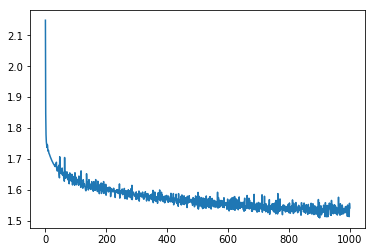

0.448825479979


In [2]:
def main():
    X, Y = getData()
    
    model = NeuralNet(200)
    model.train(X, Y, reg_param=0, show_fig=True)
    print(model.score(X, Y))
    # scores = cross_val_score(model, X, Y, cv=5)
    # print "score mean:", np.mean(scores), "stdev:", np.std(scores)

if __name__ == '__main__':
    main()

### Conclusion

> After 10000 iteration the best validation error it can be seen that the best validation error is 0.578, which is slightly less
the validation error prodced by the Multiclass Lgistic Regression Model performed on the same data in the Image Recognition  -  Logistic Regression project. 
It can be seen from the graph that the error decreases just as expected, however with some flutuations. 